**Experiment No 7**

Time Series Data Analysis
Problem statement: Analysis and Visualization of Stock Market Data

Dataset: "Stock_Prices.csv"

Description: The dataset contains historical stock price data for a particular company over a
period of time. It includes attributes such as date, closing price, volume, and other relevant
features. The goal is to perform time series data analysis on the stock price data to identify
trends, patterns, and potential predictors, as well as build models to forecast future stock
prices.

Tasks to Perform:
1. Import the "Stock_Prices.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series
analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over
time.
5. Calculate and plot moving averages or rolling averages to identify the underlying
trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as
weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as
trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential
smoothing models to forecast future stock prices.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv("Stock_Prices.csv")

In [10]:
print(data.isnull().sum())

Date            0
ClosingPrice    0
HighPrice       0
LowPrice        0
Volume          0
MarketIndex     0
dtype: int64


In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

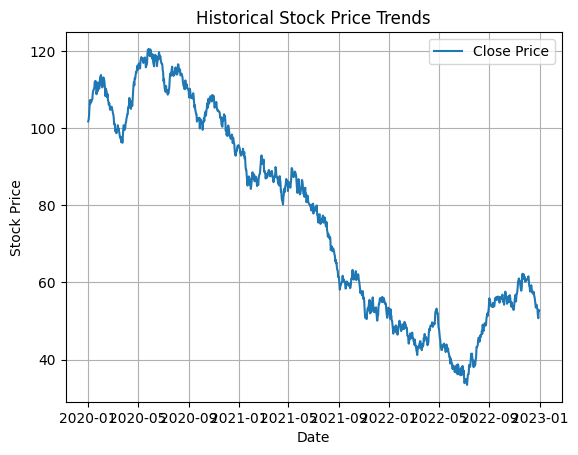

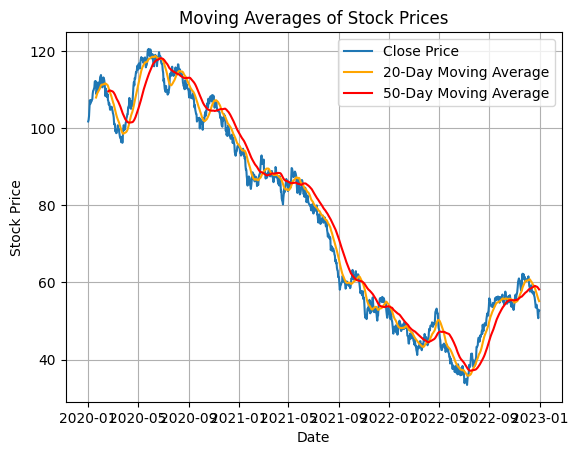

In [12]:
plt.plot(data['ClosingPrice'], label='Close Price')
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()
data['20_MA'] = data['ClosingPrice'].rolling(window=20).mean()
data['50_MA'] = data['ClosingPrice'].rolling(window=50).mean()

plt.plot(data['ClosingPrice'], label='Close Price')
plt.plot(data['20_MA'], label='20-Day Moving Average', color='orange')
plt.plot(data['50_MA'], label='50-Day Moving Average', color='red')
plt.title('Moving Averages of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

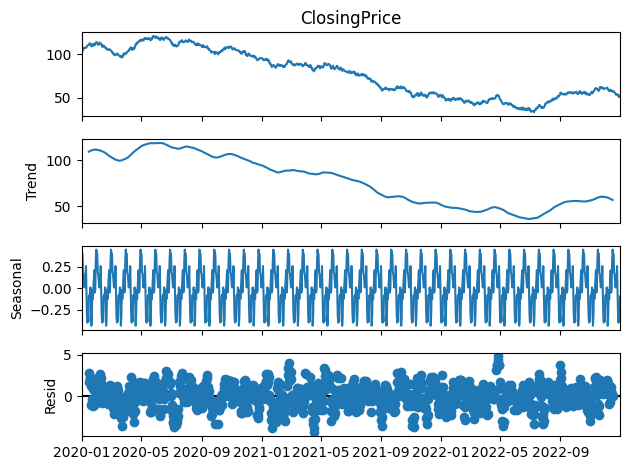

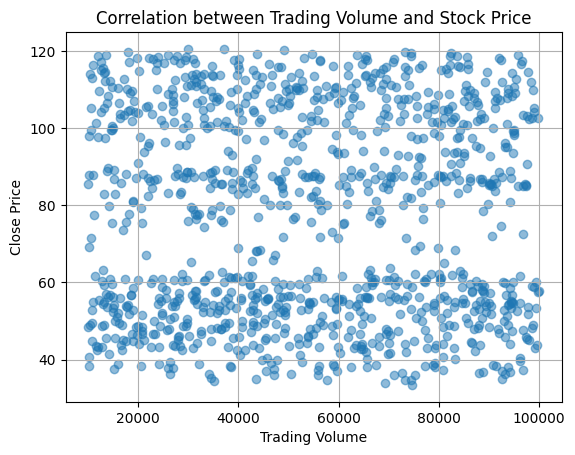

Correlation between Close Price and Volume: -0.001785042028551452


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['ClosingPrice'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot()
plt.show()

plt.scatter(data['Volume'], data['ClosingPrice'], alpha=0.5)
plt.title('Correlation between Trading Volume and Stock Price')
plt.xlabel('Trading Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

correlation = data['ClosingPrice'].corr(data['Volume'])
print(f'Correlation between Close Price and Volume: {correlation}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           ClosingPrice   No. Observations:                 1096
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1530.897
Date:                Sun, 10 Nov 2024   AIC                           3073.794
Time:                        18:19:03   BIC                           3103.785
Sample:                    01-01-2020   HQIC                          3085.142
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.031     -0.642      0.521      -0.080       0.040
ar.L2          0.0102      0.031      0.328      0.743      -0.051       0.071
ar.L3          0.0386      0.031      1.254      0.2

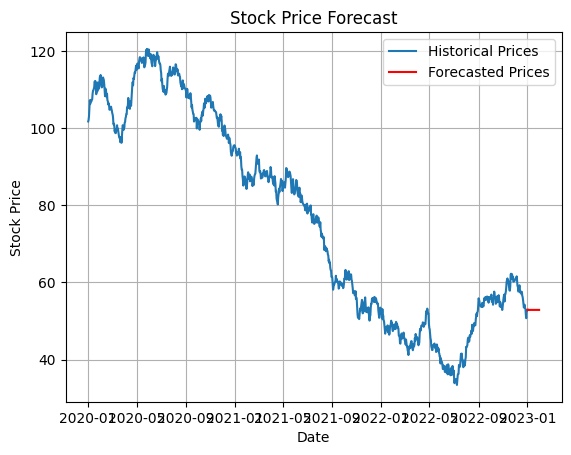

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['ClosingPrice'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=30)
plt.plot(data['ClosingPrice'], label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()